## Importing necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading the Dataset

In [2]:
dataset = pd.read_csv( 'dataset.csv' )

In [3]:
dataset.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Charges,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,1247.12,236,0
1,2,Customer_2,62,Female,New York,1,48.76,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,427.35,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,293.82,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,1104.66,266,0


In [4]:
dataset.shape

(100000, 10)

In [5]:
#To check the name of features.
dataset.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Charges',
       'Total_Usage_GB', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
dataset.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Charges                 float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
dataset.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Charges,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,811.779157,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,533.858809,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,30.060000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,378.240000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,726.340000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,1161.862500,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,2399.520000,500.000000,1.000000


## Plotting the yes and no churn values

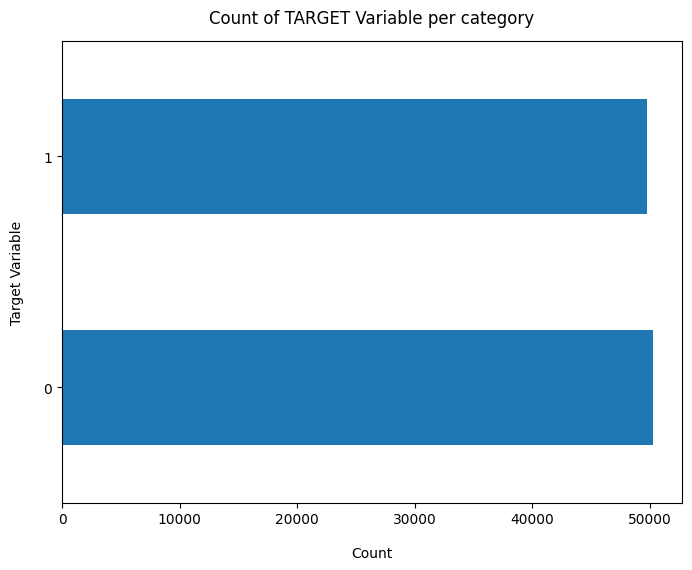

In [8]:
#1-yes and 0-no
dataset['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

The inference drawn is that the dataset is perfectly balanced, we can also print the number of yes and no values.

In [9]:
#100*dataset['Churn'].value_counts()/len(dataset['Churn'])
dataset['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

The dataset is nearly balanced, so we dont need to upscale or downscale it in order to balance it.

## Finding the number of missing values if any

In [338]:
no_val = df.isnull().sum()
print("Missing values in dataset.csv:")
print(no_val)

Missing values in dataset.csv:
CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Charges                 0
Total_Usage_GB                0
Churn                         0
Years                         0
Month                         0
dtype: int64


No null values were found so no need for interpolation.

# Data Exploration

C:\Users\HP\AppData\Local\Temp\ipykernel_13420\3588561495.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(dataset.Monthly_Bill[(df["Churn"] == 0) ],
C:\Users\HP\AppData\Local\Temp\ipykernel_13420\3588561495.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(dataset.Monthly_Bill[(df["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

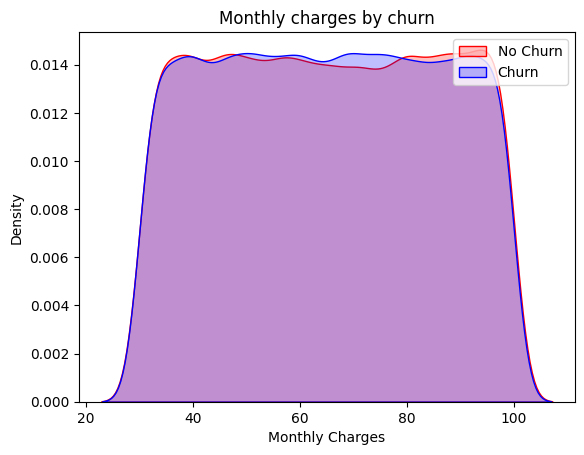

In [339]:
Mth = sns.kdeplot(dataset.Monthly_Bill[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(dataset.Monthly_Bill[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

We can see that our dataset is uniform and nicely balanced.

C:\Users\HP\AppData\Local\Temp\ipykernel_13420\2382821686.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 0) ],
C:\Users\HP\AppData\Local\Temp\ipykernel_13420\2382821686.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

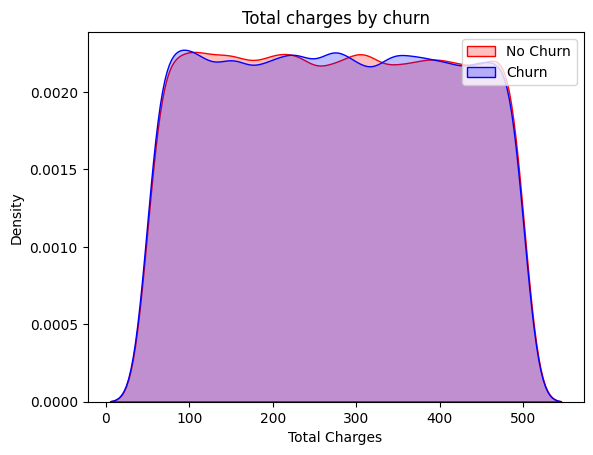

In [12]:
Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(dataset.Total_Usage_GB[(dataset["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

C:\Users\HP\AppData\Local\Temp\ipykernel_13420\3385856175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Paired")


<Axes: >

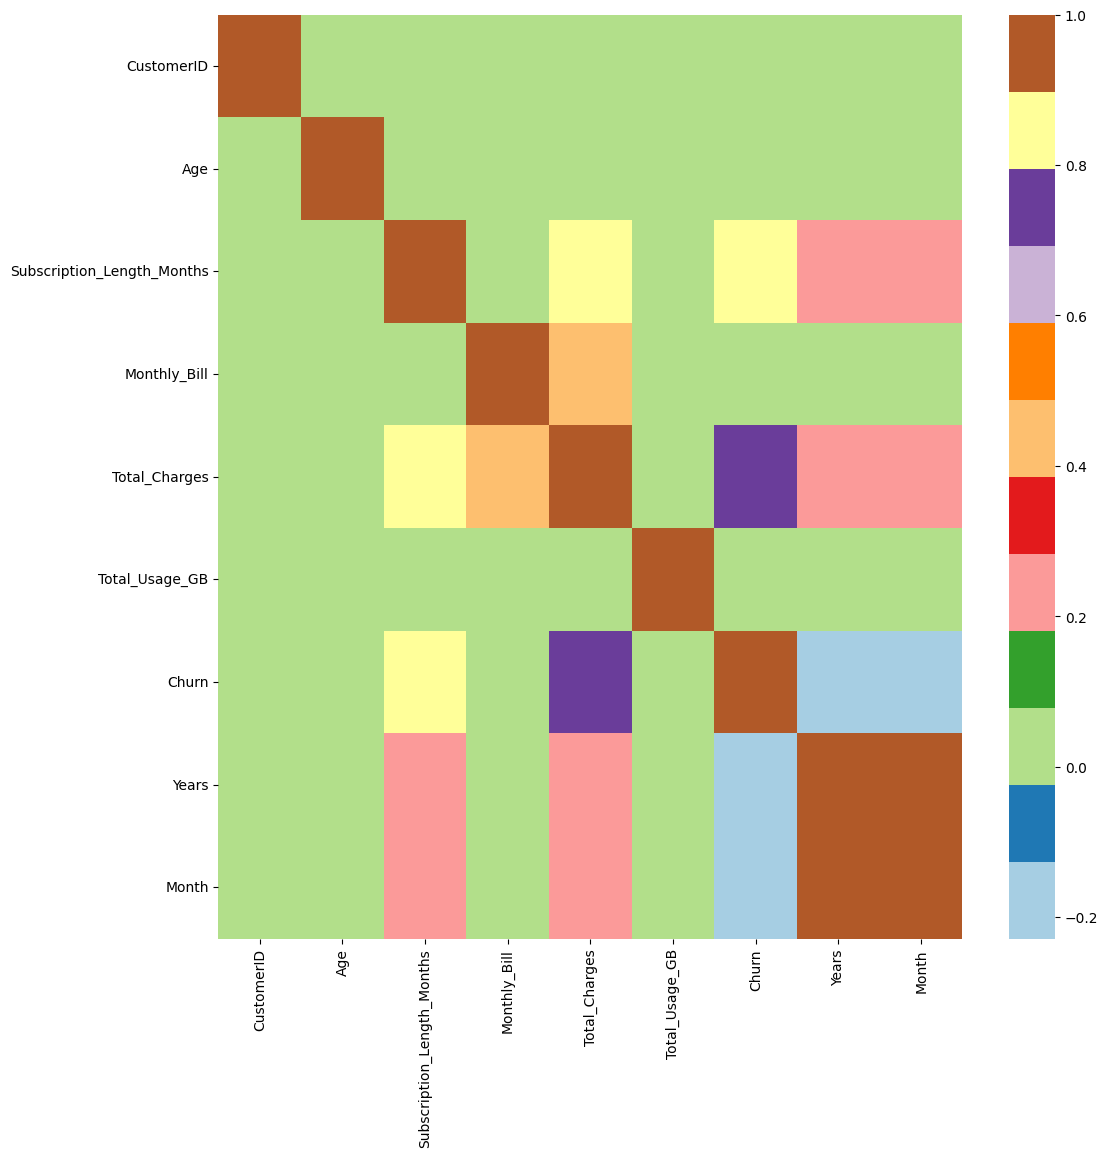

In [340]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

## Dividing the dataset.

In [14]:
dataset=pd.read_csv("dataset.csv")
X=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

In [344]:
X

array([[63, 'Male', 'Los Angeles', ..., 236, 1, 5],
       [62, 'Female', 'New York', ..., 172, 0, 1],
       [24, 'Female', 'Los Angeles', ..., 460, 0, 5],
       ...,
       [64, 'Male', 'Chicago', ..., 251, 1, 5],
       [51, 'Female', 'New York', ..., 434, 1, 8],
       [27, 'Female', 'Los Angeles', ..., 173, 1, 7]], dtype=object)

In [345]:
X.shape

(100000, 9)

In [346]:
y

0        1
1        0
2        0
3        0
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

## Encoding the data

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder

Encoding the "Gender" Categorical Data

In [14]:
le=LabelEncoder()
X[:,1]=le.fit_transform(X[:,1])

In [15]:
print(X)

[[63 1 'Los Angeles' ... 236 1 5]
 [62 0 'New York' ... 172 0 1]
 [24 0 'Los Angeles' ... 460 0 5]
 ...
 [64 1 'Chicago' ... 251 1 5]
 [51 0 'New York' ... 434 1 8]
 [27 0 'Los Angeles' ... 173 1 7]]


One Hot Encoding the "Geography" column

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [17]:
print(X)

[[0.0 1.0 63 ... 236 1 5]
 [1.0 0.0 62 ... 172 0 1]
 [1.0 0.0 24 ... 460 0 5]
 ...
 [0.0 1.0 64 ... 251 1 5]
 [1.0 0.0 51 ... 434 1 8]
 [1.0 0.0 27 ... 173 1 7]]


In [18]:
le=LabelEncoder()
X[:,3]=le.fit_transform(X[:,3])

In [19]:
print(X[3,:])

[1.0 0.0 36 3 3 97.94 293.82 297 0 3]


## Splitting the Dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Feature Engineering

In [2]:

df = pd.read_csv('dataset.csv')
df['Years'] = df['Subscription_Length_Months'].apply(lambda x:x//12)
df['Month'] = df['Subscription_Length_Months'].apply(lambda x:x%12)

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Charges,Total_Usage_GB,Churn,Years,Month
0,1,Customer_1,63,Male,Los Angeles,17,73.36,1247.12,236,0,1,5
1,2,Customer_2,62,Female,New York,1,48.76,48.76,172,0,0,1
2,3,Customer_3,24,Female,Los Angeles,5,85.47,427.35,460,0,0,5
3,4,Customer_4,36,Female,Miami,3,97.94,293.82,297,1,0,3
4,5,Customer_5,46,Female,Miami,19,58.14,1104.66,266,0,1,7


In [11]:
y=df.iloc[:,9]
y

0        1
1        0
2        0
3        0
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [4]:
T=df.iloc[:,11]
T

0         5
1         1
2         5
3         3
4         7
         ..
99995    11
99996     7
99997     5
99998     8
99999     7
Name: Month, Length: 100000, dtype: int64

In [5]:
df.iloc[:,9]=df.iloc[:,10]
df.iloc[:,10]=df.iloc[:,11]
df.head()
#X=df.iloc[:,2:9].values
#y=df.iloc[:,9].values

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Charges,Total_Usage_GB,Churn,Years,Month
0,1,Customer_1,63,Male,Los Angeles,17,73.36,1247.12,236,1,5,5
1,2,Customer_2,62,Female,New York,1,48.76,48.76,172,0,1,1
2,3,Customer_3,24,Female,Los Angeles,5,85.47,427.35,460,0,5,5
3,4,Customer_4,36,Female,Miami,3,97.94,293.82,297,0,3,3
4,5,Customer_5,46,Female,Miami,19,58.14,1104.66,266,1,7,7


In [7]:
X=df.iloc[:,2:-1].values

In [8]:
X.shape

(100000, 9)

In [9]:
X[1:5,:]

array([[62, 'Female', 'New York', 1, 48.76, 48.76, 172, 0, 1],
       [24, 'Female', 'Los Angeles', 5, 85.47, 427.35, 460, 0, 5],
       [36, 'Female', 'Miami', 3, 97.94, 293.82, 297, 0, 3],
       [46, 'Female', 'Miami', 19, 58.14, 1104.66, 266, 1, 7]],
      dtype=object)

In [12]:
y

0        1
1        0
2        0
3        0
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

# Building an ANN

## Initializing the ANN

In [22]:
ann=tf.keras.models.Sequential()

## Adding Layers

In [23]:
from tensorflow.python.keras import regularizers
ann.add(tf.keras.layers.Dense(units=9 ,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.01)))

In [24]:
ann.add(tf.keras.layers.Dense(units=6 ,activation='relu'))

In [25]:
ann.add(tf.keras.layers.Dense(units=1 ,activation='sigmoid'))

## Compiling the ANN

In [26]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

## Training the ANN on the Training set

In [30]:
ann.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
2500/2500 [==============================] - 10s 3ms/step - loss: 0.0687 - accuracy: 0.9547
Epoch 2/200
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0430 - accuracy: 0.9581
Epoch 3/200
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0424 - accuracy: 0.9581
Epoch 4/200
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0421 - accuracy: 0.9581
Epoch 5/200
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0420 - accuracy: 0.9581
Epoch 6/200
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0420 - accuracy: 0.9581
Epoch 7/200
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 8/200
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0421 - accuracy: 0.9581
Epoch 9/200
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 10/200
2500/2500 [==============================] - 7s 3ms/step - 

2500/2500 [==============================] - 6s 2ms/step - loss: 0.0422 - accuracy: 0.9580
Epoch 80/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 81/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 82/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 83/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 84/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0424 - accuracy: 0.9579
Epoch 85/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0421 - accuracy: 0.9581
Epoch 86/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 87/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 88/200
2500/2500 [==============================] - 6s 2ms/step - loss:

2500/2500 [==============================] - 6s 2ms/step - loss: 0.0422 - accuracy: 0.9580
Epoch 158/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0424 - accuracy: 0.9580
Epoch 159/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0421 - accuracy: 0.9581
Epoch 160/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0424 - accuracy: 0.9580
Epoch 161/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0420 - accuracy: 0.9581
Epoch 162/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 163/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 164/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0419 - accuracy: 0.9581
Epoch 165/200
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0423 - accuracy: 0.9580
Epoch 166/200
2500/2500 [==============================] - 6s 2ms/ste

since the ANN didnt give a good accuracy, i will try the decision tree.

In [31]:
y_pred = ann.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_class = np.argmax(y_pred) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test) 

625/625 [==============================] - 2s 2ms/step


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred.round(), normalize= 'true')
print(cm)
acc=accuracy_score(y_test, np.round(abs(y_pred)), normalize=True)
print(acc)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
0.962


## Decision Tree Classifier

In [35]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 200,max_depth=2, min_samples_leaf=20)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=200)

In [36]:
y_pred=model_dt.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [37]:
model_dt.score(X_test,y_test)

1.0

In [318]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4646
           1       1.00      1.00      1.00      4946

   micro avg       1.00      1.00      1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [267]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

In [268]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [269]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [270]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10019
           1       1.00      1.00      1.00     10153
           2       1.00      1.00      1.00      9841

    accuracy                           1.00     30013
   macro avg       1.00      1.00      1.00     30013
weighted avg       1.00      1.00      1.00     30013



Still the accuracy is pretty low. So we can use Random Forest Classifier.

## Random Forest Classifier

In [388]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 1000,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=1000)

In [389]:
y_pred=model_rf.predict(X_test)
model_rf.score(X_test,y_test)

1.0

In [332]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4646
           1       1.00      1.00      1.00      4946

   micro avg       1.00      1.00      1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [274]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [275]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10105
           1       1.00      1.00      1.00      9965
           2       1.00      1.00      1.00      9943

    accuracy                           1.00     30013
   macro avg       1.00      1.00      1.00     30013
weighted avg       1.00      1.00      1.00     30013



In [165]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1590    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1662   18    0    0    0    0    0    0    0    0    0]
 [   0    0 1649    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1552    4    0   20   73    1    1    0    0]
 [   0    0    0   18 1638    2    2    9    0    0    0    0]
 [   0    0    0    5  277  322  742  323    2    0    0    0]
 [   0    0    0    0   46  150  963  432   89    5    1    0]
 [   0    0    0    0    0   93  131 1037  362   49    2    0]
 [   0    0    0    0    0   49   18  141 1312  162   27    0]
 [   0    0    0    0    0   26    7   26    7 1527   64    0]
 [   0    0    0    0    0    2    3   11    6   75 1626    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1641]]


## Performing PCA

In [276]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [277]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [278]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [279]:
yr_predict_pca = model.predict(xr_test_pca)

In [280]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.6816712757804951
              precision    recall  f1-score   support

           0       0.88      0.82      0.85     10105
           1       0.52      0.66      0.58      9965
           2       0.72      0.56      0.63      9943

    accuracy                           0.68     30013
   macro avg       0.70      0.68      0.69     30013
weighted avg       0.70      0.68      0.69     30013



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage

# Since we can see that the best accuracy of 96% was obtained by using an ANN.

## Saving the Model.

In [40]:
ann.save('Neural Network.h5')
#ann.load_weights('Neural Network.h5')

In [33]:
import pickle

In [34]:
pickle.dump(ann, open('model.pkl','wb'))

In [50]:
#pickle.dump(ann.predict, open(filename, 'wb'))

In [35]:
model = pickle.load(open('model.pkl','rb'))
#load_model = pickle.load(open(filename, 'rb'))

In [36]:
model_score_r1 = ann.predict(X_test)

625/625 [==============================] - 1s 2ms/step


In [55]:
#x=([[63 ,'Male','Los Angeles',17,73.36,1247.12,236]])

In [56]:

#x[,:1]=le.fit_transform(x[,:1])

In [37]:
y_pred = ann.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_class = np.argmax(y_pred) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test)

625/625 [==============================] - 1s 2ms/step


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred.round(), normalize= 'true')
print(cm)
acc=accuracy_score(y_test, np.round(abs(y_pred)), normalize=True)
model_score=acc
model_score

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


0.962

In [49]:
def predict_msg(x_test, model):
    return(ann.predict(x_test).tolist())